In [1]:
# kill previous docker
# sudo docker container ls
# sudo docker rm <>
# sudo docker rm -v -f $(sudo docker ps -qa)

# bash command to run local datajoint server
# sudo docker run -p 3306:3306 -e MYSQL_ROOT_PASSWORD=simple datajoint/mysql

# configure mysql server
# mysql > CREATE USER 'root'@'%' IDENTIFIED BY 'simple';
# mysql > GRANT ALL PRIVILEGES ON *.* TO 'root'@'%';
# sudo service mysql stop


In [1]:
from dj_connection import connect_noTLS

# connect first
connect_noTLS()

[2023-08-15 10:46:15,474][INFO]: Connecting root@0.0.0.0:3306
[2023-08-15 10:46:15,481][INFO]: Connected root@0.0.0.0:3306


In [2]:
from foundation_tables import Mouse

# First, add our mice
mice = [{"prefix" : "RL1" , "mouse_id" : 1},
        # {"prefix" : "RL2" , "mouse_id" : 1},
        # {"prefix" : "RL1" , "mouse_id" : 2},
        # {"prefix" : "RL1" , "mouse_id" : 3},
        # {"prefix" : "RL1" , "mouse_id" : 4},
        # {"prefix" : "RL1" , "mouse_id" : 5},
        # {"prefix" : "RL2" , "mouse_id" : 5},
        ]
mouse = Mouse()
mouse.insert(mice, skip_duplicates=True)
Mouse() # should now show RL1_1 and RL1_5 in table

prefix mouse training group,mouse_id unique mouse id,dob mouse date of birth,"sex sex of mouse - Male, Female, or Unknown/Unclassified"
RL1,1,None,None


In [3]:
from foundation_tables import Date
from dj_utils import update_date

# Next, add dates when we collected data for these mice
update_date()
Date() # should now show 6 dates in 2022-01

session_date date where we had some form of data collection
2022-01-12
2022-01-13
2022-01-14
2022-01-16
2022-01-25


In [4]:
from foundation_tables import BehaviorSession

# Now, run populate calls on BehaviorSession and PhotometrySession 
BehaviorSession().populate()

# should now see these two having 10 entries 
BehaviorSession()

Processed new behavior session from RL1 1 2022-01-12 

Processed new behavior session from RL1 1 2022-01-13 

Processed new behavior session from RL1 1 2022-01-14 

Processed new behavior session from RL1 1 2022-01-16 

Processed new behavior session from RL1 1 2022-01-25 



prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,beha_session_time time of session,beha_path path to behavior data,"beha_data matrix of behavior data, flexible to task"
RL1,1,2022-01-12,16_39_06,./mouse_data/RL1/1/20220112/behavior2022-01-12T16_39_06.csv,=BLOB=
RL1,1,2022-01-13,18_14_22,./mouse_data/RL1/1/20220113/behavior2022-01-13T18_14_22.csv,=BLOB=
RL1,1,2022-01-14,15_14_10,./mouse_data/RL1/1/20220114/behavior2022-01-14T15_14_10.csv,=BLOB=
RL1,1,2022-01-16,17_38_14,./mouse_data/RL1/1/20220116/behavior2022-01-16T17_38_14.csv,=BLOB=
RL1,1,2022-01-25,16_42_21,./mouse_data/RL1/1/20220125/behavior2022-01-25T16_42_21.csv,=BLOB=


In [6]:
from foundation_tables import PhotometrySession

# populate it
PhotometrySession().populate() 

# see what's in it
PhotometrySession()

Processed new photometry session from RL2 1 2022-03-07 

Processed new photometry session from RL2 5 2022-03-07 



prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,photometry_path path to photometry data
RL2,1,2022-03-07,14_53_30,./mouse_data/RL2/1/20220307/Photometry2022-03-07T14_53_30.csv
RL2,5,2022-03-07,12_29_58,./mouse_data/RL2/5/20220307/Photometry2022-03-07T12_29_58.csv


In [7]:
from photometry_preprocessing import PhotometryPreprocessingParam

# Now add in some parameters to preprocess our photometry data
# This corrects for motion artifacts and changes in the baseline fluorescence
preprocessing_params0 = {
    'photometry_preprocessing_param_id' : 0 ,
    "median_filt_kernel_size" : 5,
    "lowpass_filter_frequency" : 10,
    "photobleaching_estim_method" : "polyFit_baseline",
    "photobleaching_estim_params" : {"polyfit_deg" : 4},
    "baseline_fluorescence_signal" : 'denoised',
    "baseline_fluorescence_lowpass_freq" : 0.001
}
PhotometryPreprocessingParam().insert1(preprocessing_params0, skip_duplicates = True)

PhotometryPreprocessingParam() # should now see one parameter set, using the polyFit_baseline method

photometry_preprocessing_param_id unique id for photometry preprocessing parameter set,median_filt_kernel_size,lowpass_filter_frequency,photobleaching_estim_method,photobleaching_estim_params,baseline_fluorescence_signal,baseline_fluorescence_lowpass_freq
0,5,10,polyFit_baseline,=BLOB=,denoised,0.001


In [8]:
from photometry_preprocessing import ProcessedPhotometry

# Now populate ProcessedPhotometry 
ProcessedPhotometry().populate() 
ProcessedPhotometry() # you should now see 10 entries here, and can also look in the data folders to see visualizations of intermediate pr

Processing photometry session from RL2 1 2022-03-07 



/home/felix/Documents/phd/ibl/serotonin/src/serotonindata/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/serotonindata/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


Processing photometry session from RL2 5 2022-03-07 



/home/felix/Documents/phd/ibl/serotonin/src/serotonindata/photometry_preprocessing.py:96: RankWarning: Polyfit may be poorly conditioned
  g415_baseline , g415_bleachCorrected = baseline_fun(sample_rate,sample_times,g415_denoised,**preprocessing_param['photobleaching_estim_params'])
/home/felix/Documents/phd/ibl/serotonin/src/serotonindata/photometry_preprocessing.py:97: RankWarning: Polyfit may be poorly conditioned
  g470_baseline , g470_bleachCorrected = baseline_fun(sample_rate,sample_times,g470_denoised,**preprocessing_param['photobleaching_estim_params'])


photometry_preprocessing_param_id unique id for photometry preprocessing parameter set,prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,sample_times timepoints when we sampled the GCaMP frequency,df_over_f time series of normalized fluorescence values
0,RL2,1,2022-03-07,14_53_30,=BLOB=,=BLOB=
0,RL2,5,2022-03-07,12_29_58,=BLOB=,=BLOB=


In [9]:
from behavior_processing import PhotometrySyncBehavior

# Now populate PhotometrySyncBehavior 
PhotometrySyncBehavior().populate()

PhotometrySyncBehavior() # you should now see 10 entries here

Synced behavior to photometry for RL2 1 2022-03-07 

Synced behavior to photometry for RL2 5 2022-03-07 



prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,beha_session_time time of session,wheel_position,running_speed,reward,gain,trial_num
RL2,1,2022-03-07,14_53_30,14_53_30,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL2,5,2022-03-07,12_29_58,12_29_58,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [10]:
from behavior_processing import GainChangeEvents

# Last, populate GainChangeEvents, which pulls out the photometry sample number when we had a gain change / glitch and information about said gain change / glitch
GainChangeEvents().populate()

GainChangeEvents()

gain [nan nan nan ... nan nan nan]
gain_change_samples [ 1886  3220  3425  8961 10365 10646 12024 36613 36916 46538 47747 48365
 66201 68150 69033 78533 79402]
[0.3 1.  3.  0.3 1.  3.  1.  0.3 3.  0.3 1.  3.  0.3 1.  3.  1.  3. ]
[1.  3.  0.3 1.  3.  1.  0.3 3.  0.3 1.  3.  0.3 1.  3.  1.  3.  0.3]
gain [nan nan nan ... 0.3 0.3 0.3]
gain_change_samples [  966  3248  3974  4458  7456  7598  8703 10725 11490 11710 12364 17924
 18875 22892 23325 25638 26372 30260 30550 35606 35887 37513 43547 43762
 47882 48286 51589 51764 52930 58273 61594 61914 67767 67930 69199 69722
 74806 75051 78034]
[1.  0.3 1.  3.  0.3 3.  1.  0.3 1.  3.  1.  0.3 1.  0.3 3.  0.3 1.  0.3
 3.  0.3 3.  1.  0.3 3.  0.3 3.  0.3 3.  1.  0.3 1.  3.  0.3 3.  1.  3.
 0.3 3.  1. ]
[0.3 1.  3.  0.3 3.  1.  0.3 1.  3.  1.  0.3 1.  0.3 3.  0.3 1.  0.3 3.
 0.3 3.  1.  0.3 3.  0.3 3.  0.3 3.  1.  0.3 1.  3.  0.3 3.  1.  3.  0.3
 3.  1.  0.3]


prefix mouse training group,mouse_id unique mouse id,session_date date where we had some form of data collection,photometry_session_time time of recording,beha_session_time time of session,gain_change_samples,gain_change_magnitudes,delta_position,gain_pre,gain_post
RL2,1,2022-03-07,14_53_30,14_53_30,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
RL2,5,2022-03-07,12_29_58,12_29_58,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


dt 0.03
dt 0.03


/home/felix/Documents/phd/ibl/serotonin/src/serotonindata/visualizations.py:146: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


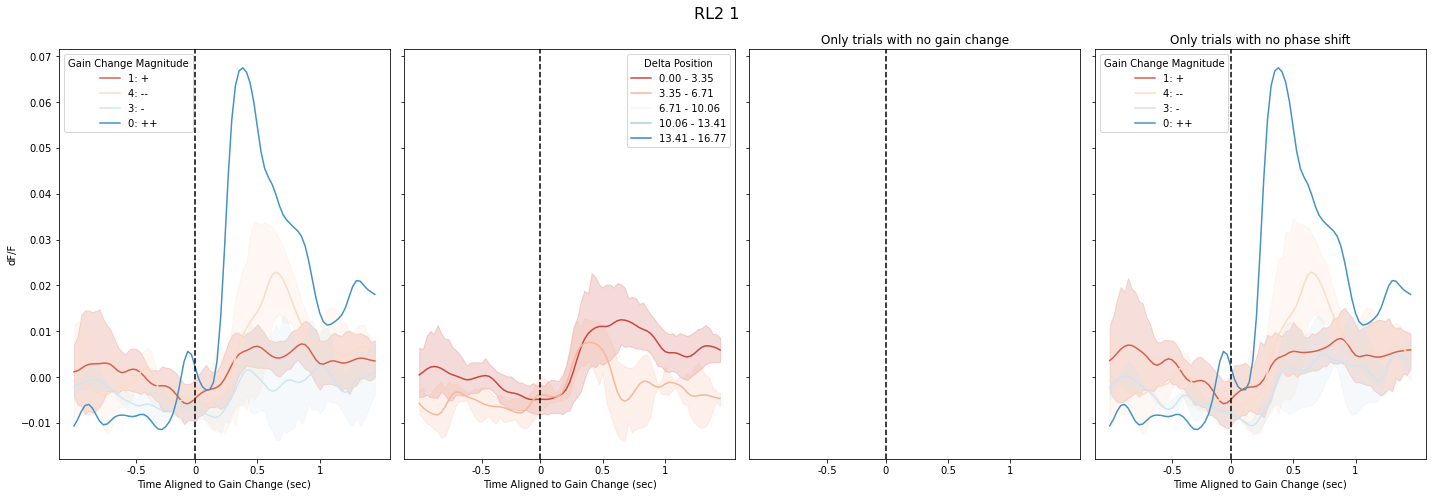

In [11]:
from visualizations import trace_visualization, TraceVisualizer

# Last, visualize data for a mouse to see how things look 
key = {"prefix" : 'RL1',"mouse_id":1}
trace_visualization(key, pooling = 'mouse')

In [19]:
mouse_id = 1
RL_id = 'RL1'

mice = [#{"prefix" : "RL1" , "mouse_id" : 1},
        {"prefix" : "RL2" , "mouse_id" : 1},
        #{"prefix" : "RL1" , "mouse_id" : 2},
        #{"prefix" : "RL1" , "mouse_id" : 3},
        #{"prefix" : "RL1" , "mouse_id" : 4},
        #{"prefix" : "RL1" , "mouse_id" : 5},
        {"prefix" : "RL2" , "mouse_id" : 5},
        ]

for mouse in mice :
        # mouse = {"prefix" : "RL2" , "mouse_id" : 1}
        print(mouse)
        mouse_id = mouse["mouse_id"]
        RL_id = mouse['prefix']
        uid =  RL_id+"_"+str(mouse_id)
        key = {"prefix" : RL_id, "mouse_id":mouse_id}
        TV = TraceVisualizer(key,pooling="mouse")
        data = TV.process_data()
        data['uid'] = uid
        print(data.shape)
        data.to_csv('mice_data_'+uid+'.csv')

{'prefix': 'RL2', 'mouse_id': 1}
dt 0.03
dt 0.03
(1411, 11)
{'prefix': 'RL2', 'mouse_id': 5}
dt 0.03
dt 0.03
(3237, 11)


In [13]:
mouse = {"prefix" : "RL2" , "mouse_id" : 1}
print(mouse)
mouse_id = mouse["mouse_id"]
RL_id = mouse['prefix']
uid =  RL_id+"_"+str(mouse_id)
key = {"prefix" : RL_id, "mouse_id":mouse_id}
TV = TraceVisualizer(key,pooling="mouse")
data = TV.process_data()
data

{'prefix': 'RL2', 'mouse_id': 1}
dt 0.03
dt 0.03


,Gain Change Magnitude,Delta Position,Delta Position value,Gain Pre,Gain Post,session_number,trial_number,Time Aligned to Gain Change (sec),dF/F,true_time
0,1: +,0.00 - 3.35,0.622435,0.3,1.0,0,1,0,-0.000675,-1.0
1,1: +,3.35 - 6.71,5.055839,1.0,3.0,0,2,0,-0.007920,-1.0
2,4: --,0.00 - 3.35,1.431348,3.0,0.3,0,3,0,-0.005312,-1.0
3,1: +,0.00 - 3.35,0.851745,0.3,1.0,0,4,0,0.005153,-1.0
4,1: +,0.00 - 3.35,1.765520,1.0,3.0,0,5,0,-0.002998,-1.0
...,...,...,...,...,...,...,...,...,...,...
1406,1: +,0.00 - 3.35,1.364987,0.3,1.0,0,13,82,0.008308,1.46
1407,1: +,0.00 - 3.35,0.885129,1.0,3.0,0,14,82,0.002431,1.46
1408,3: -,0.00 - 3.35,0.659855,3.0,1.0,0,15,82,0.007617,1.46
1409,1: +,3.35 - 6.71,5.186133,1.0,3.0,0,16,82,-0.006380,1.46


In [14]:
data

,Gain Change Magnitude,Delta Position,Delta Position value,Gain Pre,Gain Post,session_number,trial_number,Time Aligned to Gain Change (sec),dF/F,true_time
0,1: +,0.00 - 3.35,0.622435,0.3,1.0,0,1,0,-0.000675,-1.0
1,1: +,3.35 - 6.71,5.055839,1.0,3.0,0,2,0,-0.007920,-1.0
2,4: --,0.00 - 3.35,1.431348,3.0,0.3,0,3,0,-0.005312,-1.0
3,1: +,0.00 - 3.35,0.851745,0.3,1.0,0,4,0,0.005153,-1.0
4,1: +,0.00 - 3.35,1.765520,1.0,3.0,0,5,0,-0.002998,-1.0
...,...,...,...,...,...,...,...,...,...,...
1406,1: +,0.00 - 3.35,1.364987,0.3,1.0,0,13,82,0.008308,1.46
1407,1: +,0.00 - 3.35,0.885129,1.0,3.0,0,14,82,0.002431,1.46
1408,3: -,0.00 - 3.35,0.659855,3.0,1.0,0,15,82,0.007617,1.46
1409,1: +,3.35 - 6.71,5.186133,1.0,3.0,0,16,82,-0.006380,1.46


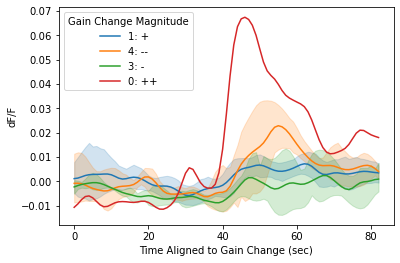

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.lineplot(
            x="Time Aligned to Gain Change (sec)",
            y="dF/F",
            hue="Gain Change Magnitude",
            data=data
        )
plt.show()

In [16]:
from visualization_utils import get_gain_change_data
import numpy as np
import pandas as pd

# now gather data within time window to get pt estimates 
time_pre = 0
time_post = 0.75
gain_change_magnitudes , delta_position , gain_pre , gain_post , gain_change_psth , _ , _ , _ , _ = get_gain_change_data({"prefix" : 1},'all',time_pre,time_post)
print(gain_change_psth.shape)
mean_signal = gain_change_psth.sum(axis = 1)

# bin delta position around max potential delta  
n_delta_position_bins = 5
sinusoid_frequency = 50/3 # from romain 
delta_position_binEdges = np.linspace(0,sinusoid_frequency + .1,n_delta_position_bins + 1)
delta_position_digitized = np.digitize(delta_position,delta_position_binEdges) - 1 
bin_names = ["%.2f - %.2f"%tuple(delta_position_binEdges[[i,i+1]]) for i in range(len(delta_position_binEdges)- 1)] 
delta_position_discr = np.full(len(delta_position_digitized),"              ")
for i_bin in range(n_delta_position_bins): 
    delta_position_discr[delta_position_digitized == i_bin] = np.full(len(delta_position_discr[delta_position_digitized == i_bin]),bin_names[i_bin])
delta_position_discr = pd.Categorical(delta_position_discr,categories=bin_names,ordered=True)

# pandas dataframe it 
signal_name = 'dF/F %.2f-%.2f'%(time_pre,time_post)
gain_change_df = pd.DataFrame({signal_name : mean_signal}) 
gain_change_df['Gain Change Magnitude'] = gain_change_magnitudes 
gain_change_df['Delta Position'] = delta_position_discr
gain_change_df['Gain Pre'] = gain_pre 
gain_change_df['Gain Post'] = gain_post


dt 0.03
(56, 25)


In [17]:
gain_change_df["Gain Change Magnitude"].unique()

array(['1: +', '4: --', '3: -', '0: ++'], dtype=object)

<AxesSubplot:xlabel='Gain Change Magnitude', ylabel='dF/F 0.00-0.75'>

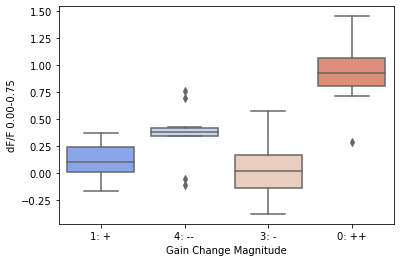

In [18]:
import seaborn as sns
sns.boxplot(x = "Gain Change Magnitude", y = signal_name, data = gain_change_df,palette = 'coolwarm')
# sns.scatterplot(x = "Gain Change Magnitude", y = signal_name, data = gain_change_df,palette = 'coolwarm')